# Data Science Final Project
Charles Laurent, Jenny Park, AJ Marino

## Part 1a - Random Forest Regressor

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import metrics

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))

pd.set_option('display.max_columns', None)

In [3]:
# TODO - Update path to files
datadir='../dev/project/CollegeScorecard_Raw_Data'

In [4]:
# import collegedatalib
import collegedatahelper

In [5]:
data_dict = collegedatahelper.create_data_dict(datadir)

In [6]:
df = data_dict['2012_13']
df_13 = data_dict['2013_14']
df_new = data_dict['2017_18']

In [7]:
# CONTROL 
# 1 - Public
# 2 - Private non-profit
# 3 - Private for-profit
df_pub = collegedatahelper.clean_df(df.loc[df['CONTROL'] == 1])
df_priv = collegedatahelper.clean_df(df.loc[df['CONTROL'] == 2])
df_priv_profit = collegedatahelper.clean_df(df.loc[df['CONTROL'] == 3])

In [8]:
df.loc[df['CONTROL'] == 1]

UNITID   OPEID  OPEID6  \
0       100654  100200    1002   
1       100663  105200    1052   
3       100706  105500    1055   
4       100724  100500    1005   
5       100751  105100    1051   
...        ...     ...     ...   
7637  23059701  367901    3679   
7649  23693901  380003    3800   
7650  23693902  380001    3800   
7651  23693903  380002    3800   
7653  24366501  394601    3946   

                                                INSTNM        CITY STABBR  \
0                             Alabama A & M University      Normal     AL   
1                  University of Alabama at Birmingham  Birmingham     AL   
3                  University of Alabama in Huntsville  Huntsville     AL   
4                             Alabama State University  Montgomery     AL   
5                            The University of Alabama  Tuscaloosa     AL   
...                                                ...         ...    ...   
7637                     Snow College-Richfield Campus   Richfield     UT   
7649             Washington State University-Vancouver   Vancouver     WA   
7650               Washington State University-Spokane     Spokane     WA   
7651            Washington State University-Tri Cities    Richland     WA   
7653  University of the Virgin Islands-Albert A. Sheen   St. Croix     VI   

             ZIP  ACCREDAGENCY  INSTURL  NPCURL  SCH_DEG  HCM2  MAIN  \
0          35762           NaN      NaN     NaN      3.0   NaN     1   
1     35294-0110           NaN      NaN     NaN      3.0   NaN     1   
3          35899           NaN      NaN     NaN      3.0   NaN     1   
4     36104-0271           NaN      NaN     NaN      3.0   NaN     1   
5     35487-0166           NaN      NaN     NaN      3.0   NaN     1   
...          ...           ...      ...     ...      ...   ...   ...   
7637       84701           NaN      NaN     NaN      2.0   NaN     0   
7649   986869600           NaN      NaN     NaN      3.0   NaN     0   
7650   992029600           NaN      NaN     NaN      3.0   NaN     0   
7651   993541671           NaN      NaN     NaN      3.0   NaN     0   
7653       00850           NaN      NaN     NaN      3.0   NaN     0   

      NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION  LOCALE  LOCALE2  \
0             1        3        4        1        1       5     NaN      NaN   
1             1        3        4        1        1       5     NaN      NaN   
3             1        3        4        1        1       5     NaN      NaN   
4             1        3        4        1        1       5     NaN      NaN   
5             1        3        4        1        1       5     NaN      NaN   
...         ...      ...      ...      ...      ...     ...     ...      ...   
7637          2        0        0        1       49       7     NaN      NaN   
7649          4        0        0        1       53       8     NaN      NaN   
7650          4        0        0        1       53       8     NaN      NaN   
7651          4        0        0        1       53       8     NaN      NaN   
7653          2        0        0        1       78       9     NaN      NaN   

      LATITUDE  LONGITUDE  CCBASIC  CCUGPROF  CCSIZSET  HBCU  PBI  ANNHI  \
0          NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
1          NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
3          NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
4          NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
5          NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
...        ...        ...      ...       ...       ...   ...  ...    ...   
7637       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
7649       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
7650       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
7651       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
7653       N

In [9]:
# DEBT_N
# GRAD_DEBT_N
# WDRAW_DEBT_N

# LO_INC_DEBT_N
# MD_INC_DEBT_N
# HI_INC_DEBT_N

# FEMALE_DEBT_N
# MALE_DEBT_N

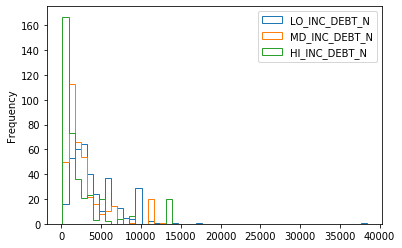

In [10]:
# df_pub.hist(column='LO_INC_DEBT_N')
# df_pub.hist(column='MD_INC_DEBT_N')
# df_pub.hist(column='HI_INC_DEBT_N')


data = {
    'LO_INC_DEBT_N': df_pub['LO_INC_DEBT_N'],
    'MD_INC_DEBT_N': df_pub['MD_INC_DEBT_N'],
    'HI_INC_DEBT_N': df_pub['HI_INC_DEBT_N']
}
df_debt = pd.DataFrame(data)
# df_debt = pd.DataFrame(
#     [df_pub['LO_INC_DEBT_N'], 
#     df_pub['MD_INC_DEBT_N'], 
#     df_pub['HI_INC_DEBT_N']]
# )

bins = 50

# df_debt.head()

# df_debt.hist()
ax = df_debt.plot.hist(bins=bins, histtype='step')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e099e10>]],
      dtype=object)

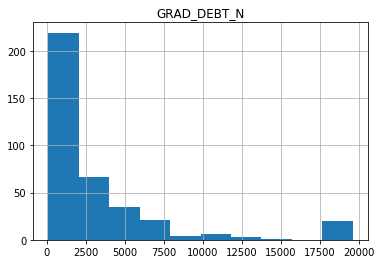

In [11]:
df_pub.hist(column='GRAD_DEBT_N')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a34d84dd0>]],
      dtype=object)

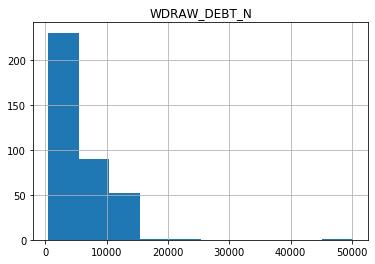

In [12]:
df_pub.hist(column='WDRAW_DEBT_N')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3d886e50>]],
      dtype=object)

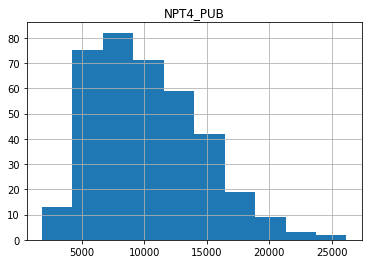

In [13]:
df_pub.hist(column='NPT4_PUB')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3fcbef10>]],
      dtype=object)

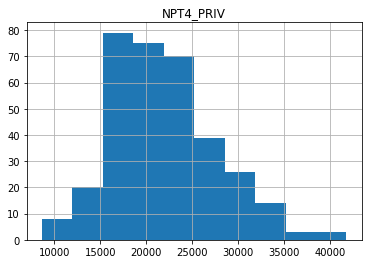

In [14]:
df_priv.hist(column='NPT4_PRIV')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d7a5bd0>]],
      dtype=object)

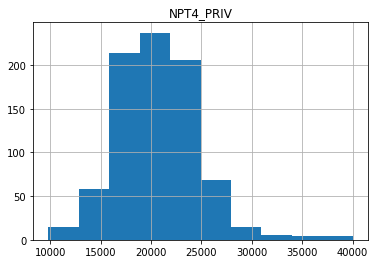

In [15]:
df_priv_profit.hist(column='NPT4_PRIV')

In [16]:
# train_features['DEBT_N']

In [17]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
# rf.fit(train_features, train_labels);


In [18]:
train_labels = []

for col in df_pub.columns:
    if df_pub[col].dtypes != 'object':
        train_labels.append(col)

In [19]:
# train_labels

In [20]:
train_labels.remove('UNITID')
train_labels.remove('OPEID')
train_labels.remove('OPEID6')


In [21]:
train_features = df_pub.copy()[train_labels]

In [22]:
train_features

SCH_DEG  MAIN  NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION  \
5         3.0     1          1        3        4        1        1       5   
15        2.0     1          1        2        2        1        1       5   
28        2.0     1          1        2        2        1        1       5   
29        2.0     1          1        2        2        1        1       5   
50        3.0     1          1        3        4        1        1       5   
...       ...   ...        ...      ...      ...      ...      ...     ...   
5424      2.0     1          1        2        2        1       24       2   
5532      2.0     0          2        2        2        1       53       8   
5599      3.0     0          3        1        2        1        5       5   
6175      3.0     0          3        3        4        1       12       5   
6659      3.0     0          2        3        0        1       27       4   

      PCIP01  PCIP03  PCIP04  PCIP05  PCIP09  PCIP10  PCIP11  PCIP12  PCIP13  \
5     0.0000  0.0036     0.0  0.0033  0.1087  0.0000  0.0056  0.0000  0.0819   
15    0.0059  0.0000     0.0  0.0000  0.0000  0.0000  0.0197  0.0000  0.0000   
28    0.0298  0.0000     0.0  0.0000  0.0000  0.0138  0.0665  0.0367  0.0000   
29    0.0148  0.0000     0.0  0.0000  0.0000  0.0000  0.0141  0.0155  0.0000   
50    0.0000  0.0000     0.0  0.0000  0.0425  0.0000  0.0231  0.0000  0.1210   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5424  0.0106  0.0000     0.0  0.0000  0.0000  0.0000  0.0314  0.0051  0.0234   
5532  0.0000  0.0000     0.0  0.0000  0.0000  0.0000  0.0741  0.0000  0.0015   
5599  0.0000  0.0000     0.0  0.0000  0.0000  0.0000  0.0000  0.0138  0.0124   
6175  0.0000  0.0309     0.0  0.0000  0.0497  0.0000  0.0000  0.0000  0.0752   
6659  0.0000  0.0000     0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   

      PCIP14  PCIP15  PCIP16  PCIP19  PCIP22  PCIP23  PCIP24  PCIP25  PCIP26  \
5     0.0745  0.0000  0.0087  0.0658  0.0000  0.0172  0.0000     0.0  0.0350   
15    0.0000  0.0000  0.0000  0.0000  0.0434  0.0000  0.5148     0.0  0.0000   
28    0.0000  0.0802  0.0000  0.0367  0.0000  0.0000  0.2422     0.0  0.0000   
29    0.0000  0.0843  0.0000  0.0049  0.0014  0.0000  0.4301     0.0  0.0000   
50    0.0635  0.0000  0.0086  0.0000  0.0000  0.0134  0.0000     0.0  0.0597   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5424  0.0051  0.0365  0.0069  0.0062  0.0106  0.0000  0.3341     0.0  0.0000   
5532  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.5492     0.0  0.0030   
5599  0.0000  0.0509  0.0000  0.0000  0.0000  0.0000  0.1774     0.0  0.0000   
6175  0.0000  0.0000  0.0000  0.0000  0.0000  0.0658  0.0523     0.0  0.0000   
6659  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000     0.0  0.0000   

      PCIP27  PCIP29  PCIP30  PCIP31  PCIP38  PCIP39  PCIP40  PCIP41  PCIP42  \
5     0.0067  0.0000  0.0192  0.0000  0.0045     0.0  0.0107  0.0000  0.0397   
15    0.0000  0.0000  0.0000  0.0059  0.0000     0.0  0.0000  0.0000  0.0000   
28    0.0000  0.0000  0.0000  0.0000  0.0000     0.0  0.0000  0.0000  0.0000   
29    0.0000  0.0056  0.0000  0.0000  0.0000     0.0  0.0000  0.0000  0.0000   
50    0.0043  0.0000  0.0624  0.0118  0.0011     0.0  0.0204  0.0000  0.0317   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5424  0.0000  0.0000  0.0099  0.0080  0.0000     0.0  0.0000  0.0018  0.0000   
5532  0.0000  0.0000  0.0000  0.0000  0.0000     0.0  0.0061  0.0000  0.0000   
5599  0.0000  0.0000  0.0303  0.0000  0.0000     0.0  0.0000  0.0000  0.0000   
6175  0.0000  0.0000  0.0000  0.0000  0.0000     0.0  0.0000  0.0000  0.0980   
6659  0.0000  0.0000  0.0000  0.0000  0.0000     0.0  0.0000  0.0000  0.0000   

      PCIP43  PCIP44  PCIP45  PCIP46  PCIP47  PCIP48  PCIP49  PCIP50  PCIP51  \
5     0.0207  0.0132  0.0522  0.0000  0.0000  0.0000  0.0000  0.0366  0.0953   
15    0.0000  0.0000  0.00

In [23]:
target = train_features['DEBT_N']

# train_features_array = train_features.iloc[:, : 400]
train_features_array = train_features

In [24]:
# Train the model on training data
rf.fit(train_features_array, target)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [25]:
rf.feature_importances_

array([1.92269768e-05, 2.86316946e-05, 1.48741248e-03, 1.34751243e-07,
       9.69907457e-05, 0.00000000e+00, 1.98934191e-04, 4.51701320e-06,
       1.34547112e-07, 9.11047928e-08, 1.28580866e-07, 1.47095849e-07,
       9.89474891e-07, 1.75599035e-06, 6.03639992e-07, 2.02409906e-05,
       1.45098263e-06, 4.80368929e-07, 5.68023447e-07, 3.36142385e-06,
       4.81004466e-07, 7.10228025e-05, 1.59833262e-07, 3.34105002e-07,
       3.21756631e-05, 5.48959420e-06, 3.31434368e-06, 2.09737915e-09,
       5.04474621e-06, 3.13358868e-07, 1.88698514e-06, 5.87440563e-11,
       2.43462451e-07, 8.02489095e-06, 1.39377422e-07, 1.35809464e-06,
       2.53335028e-06, 2.27402250e-07, 1.36766493e-07, 3.90425633e-05,
       1.15884918e-07, 1.64716699e-07, 3.95338155e-06, 1.24688737e-06,
       9.70028453e-07, 2.23817986e-07, 1.36372921e-07, 2.32815945e-08,
       1.70715038e-08, 4.46809740e-08, 7.64275736e-08, 2.70438315e-08,
       9.19422631e-09, 1.22799088e-08, 0.00000000e+00, 7.47744780e-08,
      

In [26]:
train_features_array.columns

Index(['SCH_DEG', 'MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL',
       'ST_FIPS', 'REGION', 'PCIP01', 'PCIP03',
       ...
       'NOTFIRSTGEN_RPY_3YR_RT_SUPP', 'ICLEVEL', 'UGDS_MEN', 'UGDS_WOMEN',
       'CDR3_DENOM', 'CDR2_DENOM', 'D_PCTPELL_PCTFLOAN', 'OPENADMP', 'UGNONDS',
       'debt_to_income'],
      dtype='object', length=867)

In [27]:
important_features_dict = {}
for x,i in enumerate(rf.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

# important_features_list

In [28]:
top_features = train_features_array.columns[important_features_list]

In [29]:
top_features[:20]

Index(['CUML_DEBT_N', 'DEBT_N', 'LOAN_YR2_N', 'MALE_DEBT_N', 'FEMALE_DEBT_N',
       'SEPAR_DT_N', 'LOAN_YR3_N', 'NOTFIRSTGEN_DEBT_N', 'RPY_1YR_N',
       'MD_INC_DEBT_N', 'MALE_RPY_1YR_N', 'REPAY_DT_N', 'PELL_RPY_1YR_N',
       'FEMALE_RPY_1YR_N', 'DEP_INC_N', 'PAR_ED_N', 'MD_INC_RPY_1YR_N',
       'CDR2_DENOM', 'MD_INC_YR2_N', 'CDR3_DENOM'],
      dtype='object')

In [30]:
features_dir = './data'

In [31]:
# features_df = pd.read_csv(f'{features_dir}/dictionary.csv', low_memory=False)[['VARIABLE NAME', 'dev-category', 'API data type', 'NAME OF DATA ELEMENT']]
features_df = collegedatahelper.get_features_dictionary(features_dir)


In [32]:
features_df['dev-category'].unique()

array(['root', 'school', 'admissions', 'academics', 'student', 'cost',
       'aid', 'completion', 'repayment', 'earnings'], dtype=object)

In [33]:
# train_feature_categories = [
#     'admissions',
#     'academics',
#     'student',
#     'cost'
# ]
train_feature_categories = collegedatahelper.train_feature_categories

In [34]:
train_features = collegedatahelper.getTrainFeatures(features_df)

len(train_features)

414

In [35]:
df_blah = collegedatahelper.format_df(df, True)

df_blah_13 = collegedatahelper.format_df(df_13, True)

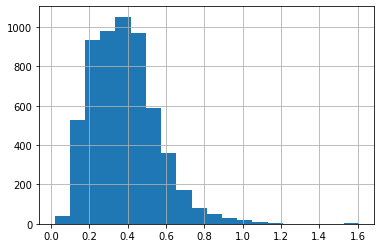

In [36]:
df_blah['debt_to_income'].hist(bins=20)


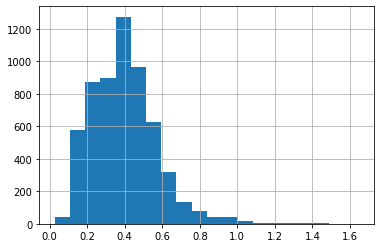

In [37]:
df_blah_13['debt_to_income'].hist(bins=20)

In [38]:
# CONTROL 
# 1 - Public
# 2 - Private non-profit
# 3 - Private for-profit
df_pub_blah = df_blah_13.loc[df_blah_13['CONTROL'] == 1]
df_priv_blah = df_blah_13.loc[df_blah_13['CONTROL'] == 2]
df_priv_profit_blah = df_blah_13.loc[df_blah_13['CONTROL'] == 3]

In [39]:
df_pub_blah.shape

(1673, 1978)

In [40]:
# TODO CL - should create a function for this!!!!

rows = df_pub_blah.shape[0]
df_pub_blah = df_pub_blah.dropna(axis=1, thresh=rows*0.7)

df_pub_blah = df_pub_blah.dropna(axis=0) 



In [41]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 


In [42]:
train_features_true = intersection(df_pub_blah.columns, train_features)

In [43]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data


In [44]:
rf2.fit(df_pub_blah[train_features_true], df_pub_blah['debt_to_income'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [45]:
important_features_dict = {}
for x,i in enumerate(rf2.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

In [46]:
top_features = train_features_array.columns[important_features_list]

In [47]:
top_features[:20]

Index(['NPT4_3075_PUB', 'NPT4_75UP_PUB', 'NUM44_PUB', 'CIP54CERT2',
       'NUM45_PUB', 'CIP52ASSOC', 'NPT4_048_PUB', 'CIP12BACHL', 'CIP54BACHL',
       'PCIP31', 'UGDS_WHITE', 'NUM41_PUB', 'UGDS_BLACK', 'UGDS_2MOR',
       'CIP52BACHL', 'CIP52CERT4', 'DISTANCEONLY', 'NUM43_PUB', 'CIP54CERT1',
       'NUM42_PUB'],
      dtype='object')